In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
sns.set()

In [2]:
# Importing csv files and creating dataframes

hour = pd.read_csv('hour.csv')
day = pd.read_csv('day.csv')
hour = hour.set_index('instant')
day = day.set_index('instant')

In [3]:
hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Visualization of the most important attributes

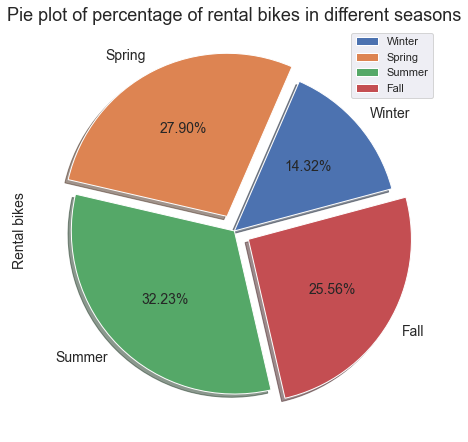

In [3]:
# Percentage of rental bikes in different seasons

day2 = day[['season','cnt']]
day2 = day2.groupby('season').sum()
lst = ['Winter','Spring','Summer','Fall']
day2.plot.pie(y='cnt', labels=lst, figsize=(7.5, 7.5), autopct='%1.2f%%', startangle=15, 
              shadow = True, explode=(0, 0.1, 0, 0.1), textprops={'fontsize': 14})
plt.ylabel('Rental bikes', fontsize= 14)
plt.title('Pie plot of percentage of rental bikes in different seasons', fontsize=18);

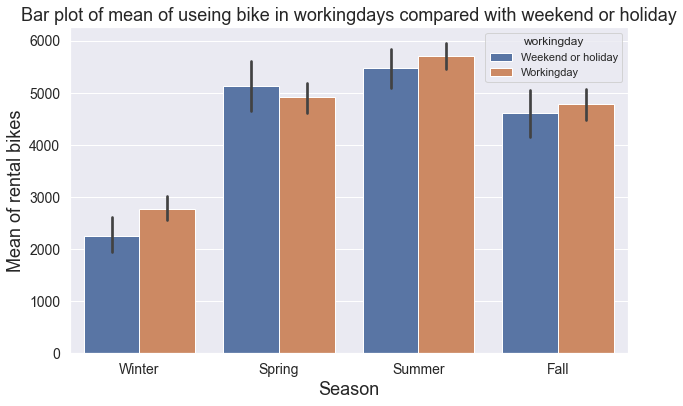

In [4]:
# Comparing average of useing bike in workingdays with weekend or holidays

day3 =day.copy()
dict1 = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
dict2 = {1:'Workingday', 0:'Weekend or holiday'}
day3['season'] = day3['season'].map(dict1)
day3['workingday'] = day3['workingday'].map(dict2)
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='workingday', data=day3)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Mean of rental bikes', fontsize= 18)
plt.title('Bar plot of mean of useing bike in workingdays compared with weekend or holiday', fontsize=18);

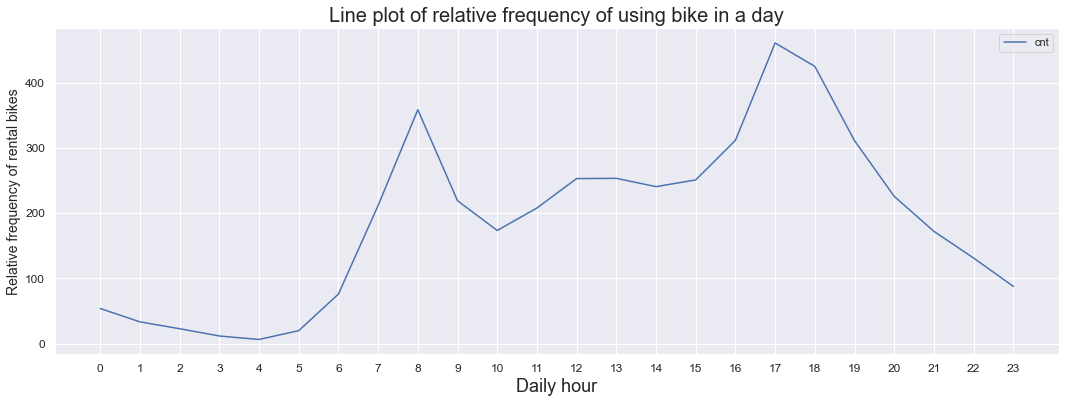

In [5]:
# Line plot of relative frequency of using bike in a day 

hour2 = hour.groupby(['hr']).mean()
hour3 = hour2.reset_index()
hour3.plot(x='hr', y='cnt', figsize=(18,6), fontsize=17)
xvalues = np.arange(24)
plt.xticks(xvalues, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Daily hour', fontsize=18)
plt.ylabel('Relative frequency of rental bikes', fontsize= 14)
plt.title('Line plot of relative frequency of using bike in a day', fontsize=20);

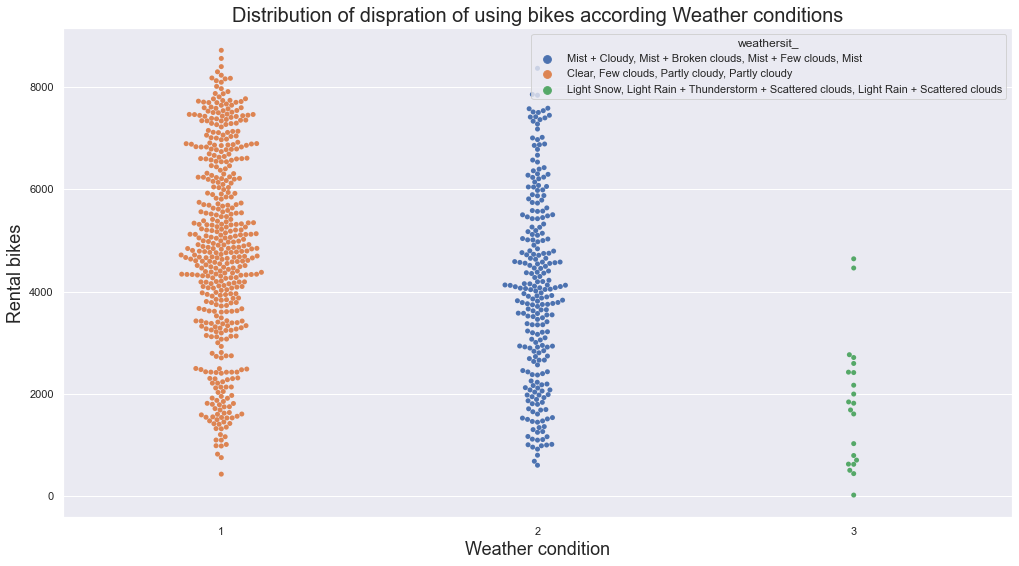

In [6]:
# Distribution of dispration of using bikes according Weather conditions

day4 =day.copy()
plt.figure(figsize=(17, 9))
dict1 = {1:'Clear, Few clouds, Partly cloudy, Partly cloudy', 
         2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 
         3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'}
day4['weathersit_'] = day4['weathersit'].map(dict1)
sns.swarmplot(x='weathersit', y='cnt', hue='weathersit_', data=day4)
plt.xlabel('Weather condition', fontsize=18)
plt.ylabel('Rental bikes', fontsize= 18)
plt.title('Distribution of dispration of using bikes according Weather conditions', fontsize=20);

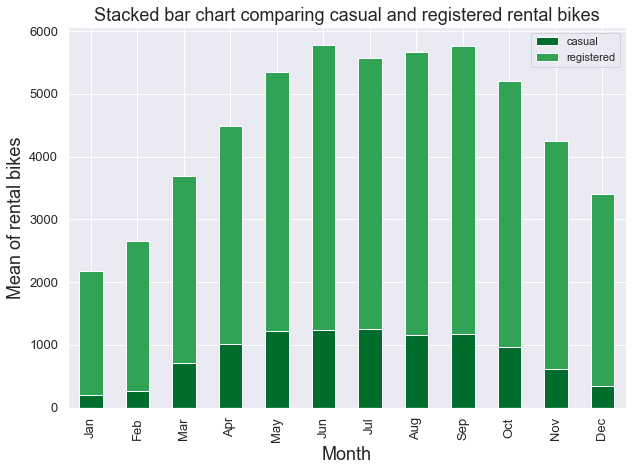

In [7]:
# Stacked bar chart comparing casual and registered rental bikes

day5 = day[['mnth','casual','registered']]
dict1 = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
day5 = day5.groupby('mnth').mean()
day5 = day5.reset_index()
day5['mnth'] = day5['mnth'].map(dict1)
colors = ['#006D2C', '#31A354']
day5.plot.bar(x='mnth', stacked=True, color=colors, figsize=(10,7))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Mean of rental bikes', fontsize= 18)
plt.title('Stacked bar chart comparing casual and registered rental bikes', fontsize=18);


# Explore relationships between attributes

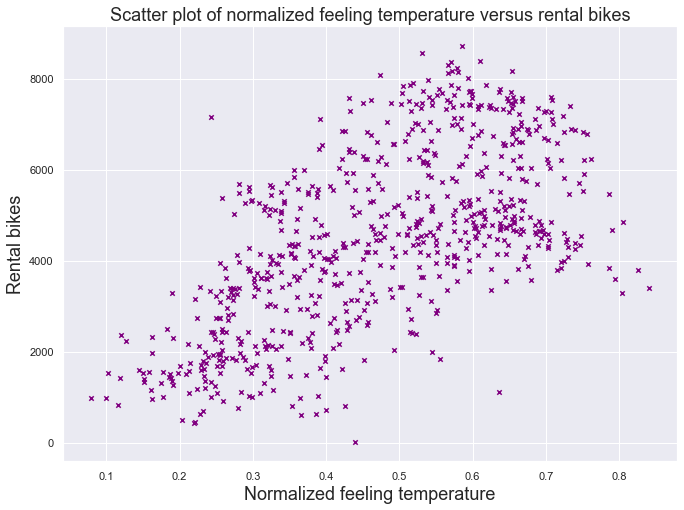

In [8]:
# Scatter plot of normalized feeling temperature versus rental bikes

plt.figure(figsize=(11, 8))
plt.scatter(x=day['atemp'], y=day['cnt'], alpha=1, s=20, color='purple', marker='x')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Normalized feeling temperature', fontsize=18)
plt.ylabel('Rental bikes', fontsize= 18)
plt.title('Scatter plot of normalized feeling temperature versus rental bikes', fontsize=18);

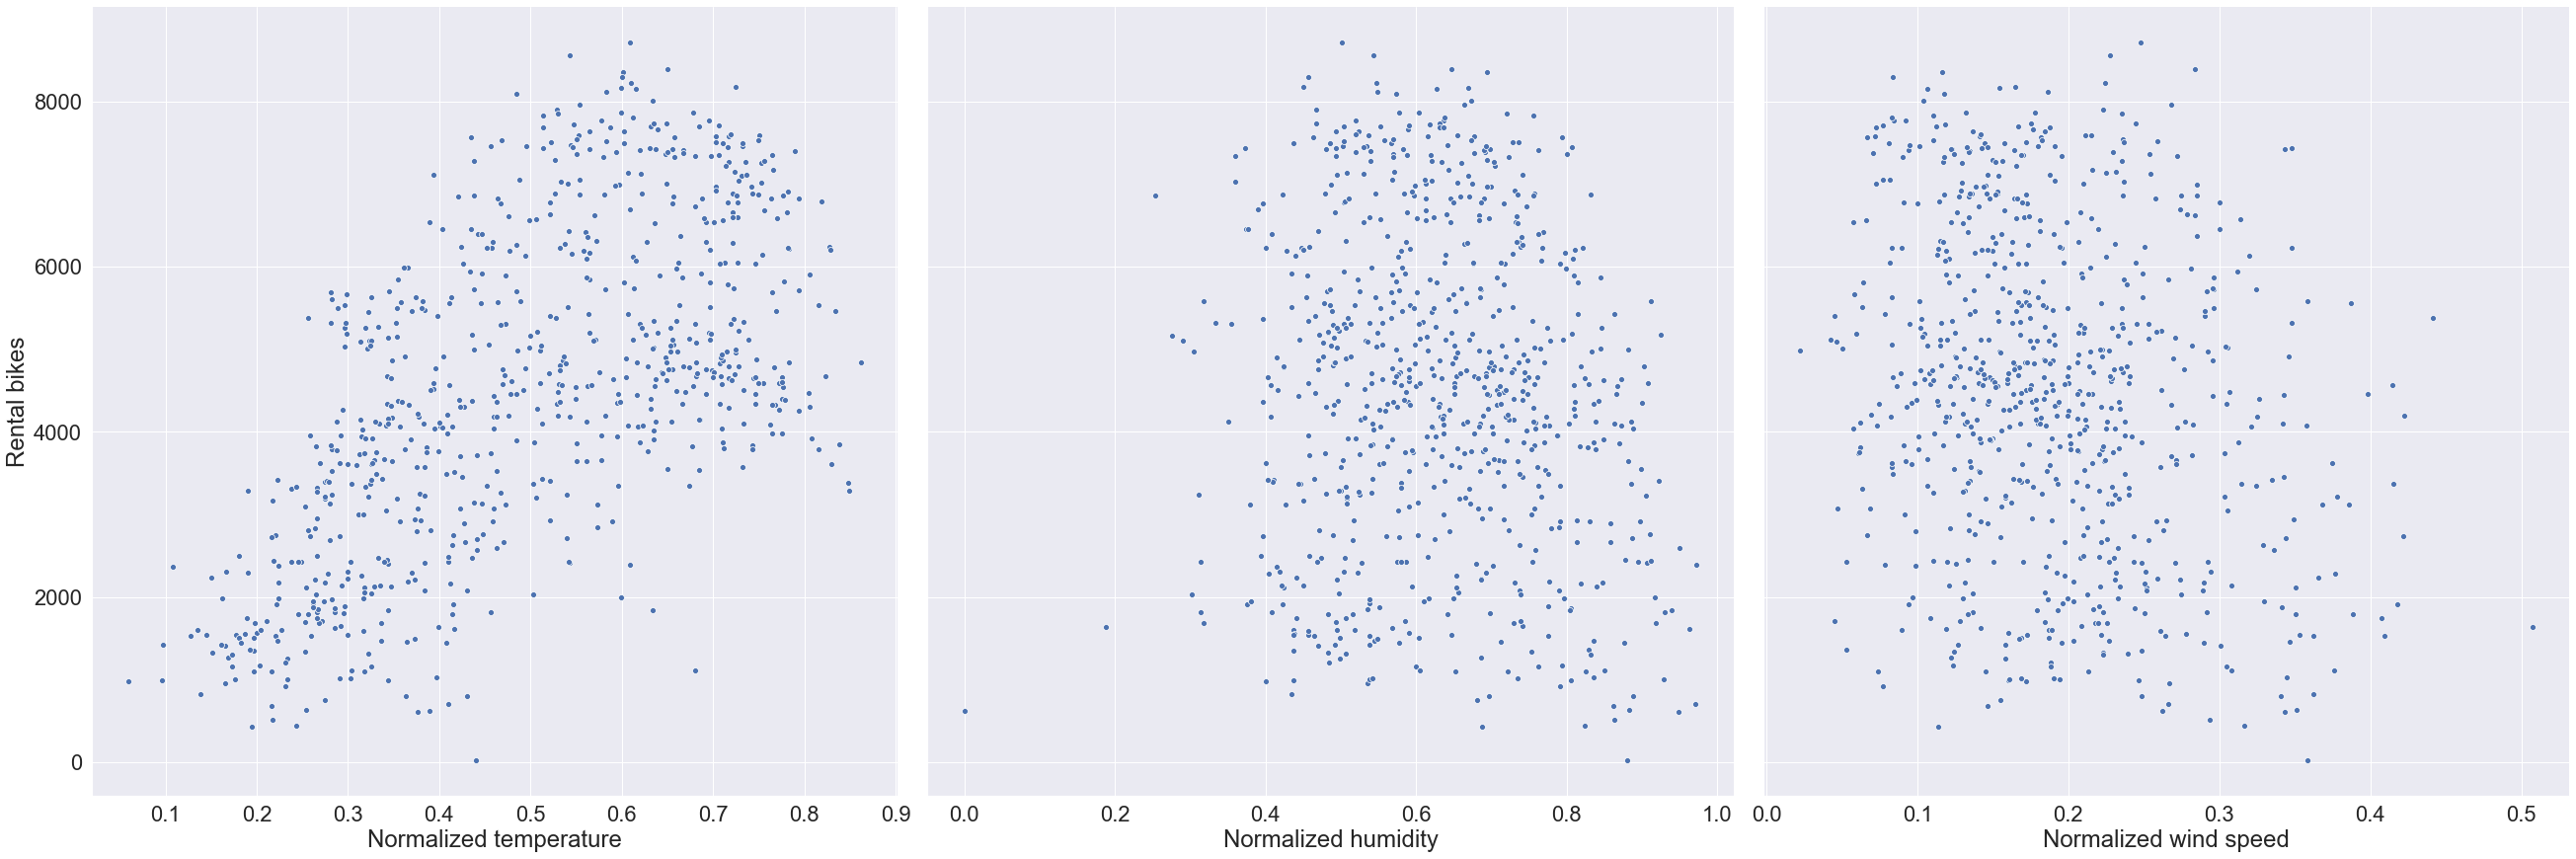

In [9]:
# Visualization of relationship between normalized temperature, humidity and wind speed with rental bikes

sns.set(font_scale=2)
day6 = day.rename(columns={'temp': 'Normalized temperature', 'hum': 'Normalized humidity', 
                     'windspeed':'Normalized wind speed', 'cnt':'Rental bikes'})
sns.pairplot(day6, x_vars=['Normalized temperature','Normalized humidity','Normalized wind speed'], 
             y_vars='Rental bikes', height=12, aspect=1);

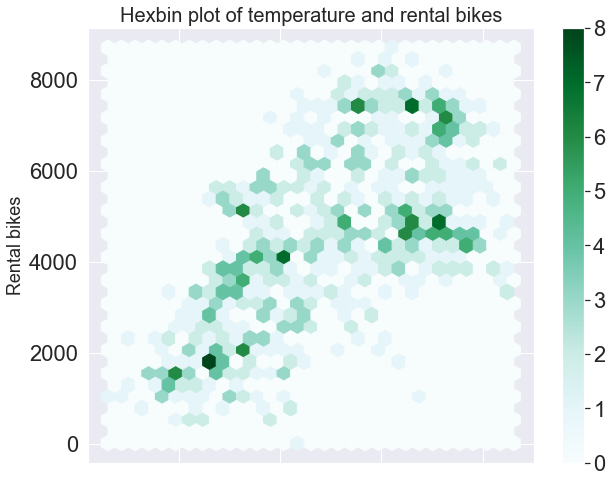

In [10]:
# Hexbin plot representing the relationship of normalized temperature and rental bikes

day.plot.hexbin(x = 'temp', y = 'cnt', gridsize=30, figsize=(10,8))
plt.ylabel('Rental bikes', fontsize= 18)
plt.title('Hexbin plot of temperature and rental bikes', fontsize=20);

# Modeling

## 1) Linear Regression

**Features:**
- Normalized temperature: Normalized temperature in Celsius. The values are divided to 41 (max)
- Normalized humidity: Normalized humidity. The values are divided to 100 (max)
- Normalized wind speed: Normalized wind speed. The values are divided to 67 (max)

**Response variable:**
- Rental bikes: Count of total rental bikes including both casual and registered

### Questions?

1. Is there a relationship between normalized temperature and rental bikes?
2. Is there a relationship between normalized humidity and rental bikes?
3. Is there a relationship between normalized wind speed and rental bikes?
2. How strong are these relationships?

### Estimate the simple linear regression coefficients for the day data using scikit-learn 

In [11]:
# X: Normalized temperature
# Y: Rental bikes

# Assigning X and Y variables
x1 = day['temp']
y1 = day['cnt']
print('X Shape: ', x1.shape)
print('Y Shape: ', y1.shape)
x1_matrix = x1.values.reshape(-1, 1)
print('Adjusted X shape: ', x1_matrix.shape)

# Instantiation and fiting the model 
reg1 = LinearRegression()
reg1.fit(x1_matrix, y1)

# Coefficients
slop = reg1.coef_
intc = reg1.intercept_
print('Slop = ', slop)
print('Intercept = ', intc)

X Shape:  (731,)
Y Shape:  (731,)
Adjusted X shape:  (731, 1)
Slop =  [6640.70999855]
Intercept =  1214.6421190294031


In [12]:
# X: Normalized humidity
# Y: Rental bikes

# Assigning X and Y variables
x2 = day['hum']
y2 = day['cnt']
print('X Shape: ', x2.shape)
print('Y Shape: ', y2.shape)
x2_matrix = x2.values.reshape(-1, 1)
print('Adjusted X shape: ', x2_matrix.shape)

# Instantiation and fiting the model 
reg2 = LinearRegression()
reg2.fit(x2_matrix, y2)

# Coefficients
slop = reg2.coef_
intc = reg2.intercept_
print('Slop = ', slop)
print('Intercept = ', intc)

X Shape:  (731,)
Y Shape:  (731,)
Adjusted X shape:  (731, 1)
Slop =  [-1369.0806579]
Intercept =  5363.986453971191


In [13]:
# X: Normalized wind speed
# Y: Rental bikes

# Assigning X and Y variables
x3 = day['windspeed']
y3 = day['cnt']
print('X Shape: ', x3.shape)
print('Y Shape: ', y3.shape)
x3_matrix = x3.values.reshape(-1, 1)
print('Adjusted X shape: ', x3_matrix.shape)

# Instantiation and fiting the model 
reg3 = LinearRegression()
reg3.fit(x3_matrix, y3)

# Coefficients
slop = reg3.coef_
intc = reg3.intercept_
print('Slop = ', slop)
print('Intercept = ', intc)

X Shape:  (731,)
Y Shape:  (731,)
Adjusted X shape:  (731, 1)
Slop =  [-5862.91276042]
Intercept =  5621.152878047153


## Interpretation of results

- A unit increase in normalized temperature is associated with a 6640.71 unit increase in rental bikes.
- A unit increase in normalized humidity is associated with a 1369.08 unit decrease in rental bikes.
- A unit increase in normalized wind speed is associated with a 5862.91 unit decrease in rental bikes.

## Prediction

In [14]:
# Temperature prediction

df1 = pd.DataFrame(data=[0.25, 0.56], columns = ['Temperature'])
prd = reg1.predict(df1)
df2 = pd.DataFrame(data=prd, columns = ['Prediction'])                              
df = pd.concat([df1, df2], axis=1)
df

,Temperature,Prediction
0,0.25,2874.819619
1,0.56,4933.439718


In [15]:
# Humidity prediction

df1 = pd.DataFrame(data=[0.4, 0.78], columns = ['Humidity'])
prd = reg2.predict(df1)
df2 = pd.DataFrame(data=prd, columns = ['Prediction'])                              
df = pd.concat([df1, df2], axis=1)
df

,Humidity,Prediction
0,0.40,4816.354191
1,0.78,4296.103541


In [16]:
# Wind speed prediction

df1 = pd.DataFrame(data=[0.09, 0.33], columns = ['Wind speed'])
prd = reg3.predict(df1)
df2 = pd.DataFrame(data=prd, columns = ['Prediction'])                              
df = pd.concat([df1, df2], axis=1)
df

,Wind speed,Prediction
0,0.09,5093.490730
1,0.33,3686.391667


## Plotting the regression line

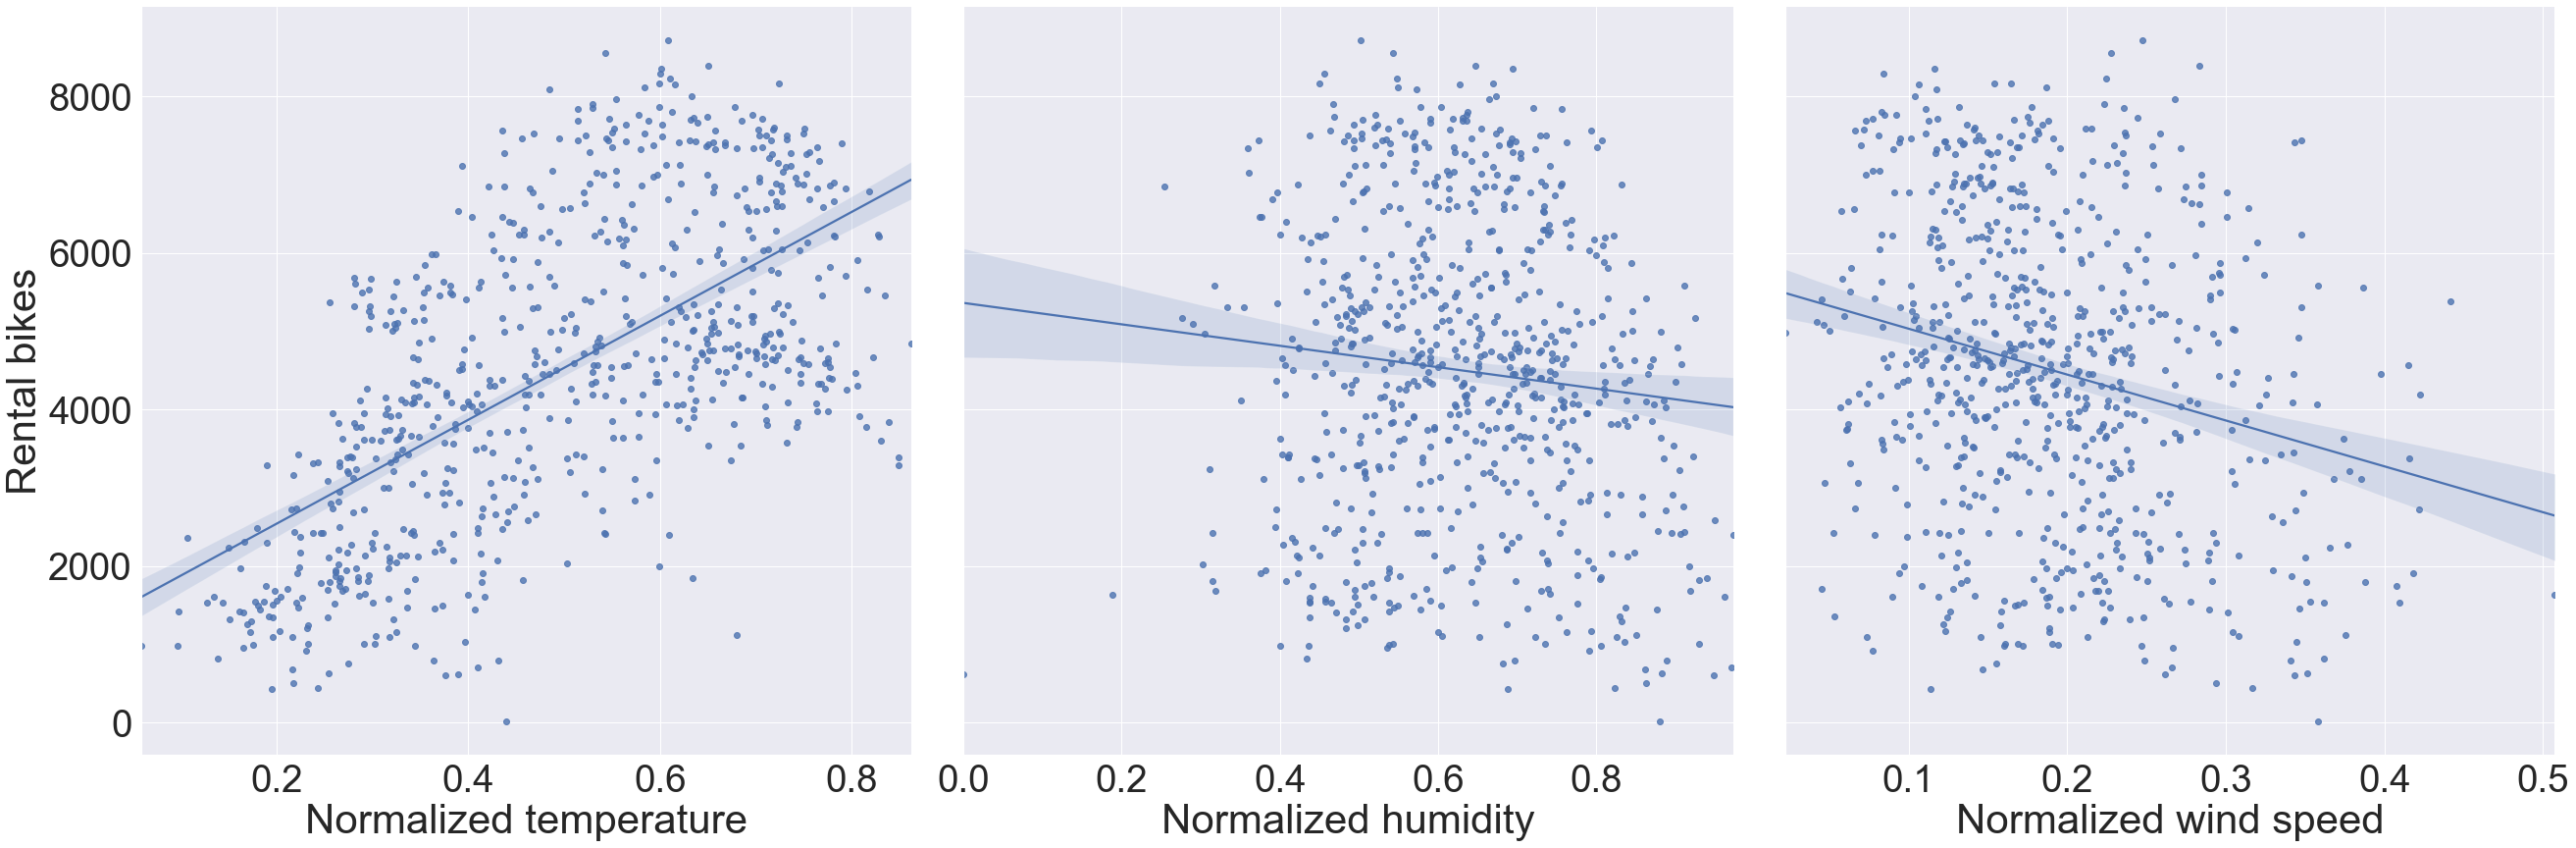

In [17]:
# Visualization of relationship between normalized temperature, humidity and wind speed with rental bikes

sns.set(font_scale=3.5)
day6 = day.rename(columns={'temp': 'Normalized temperature', 'hum': 'Normalized humidity', 
                     'windspeed':'Normalized wind speed', 'cnt':'Rental bikes'})
sns.pairplot(day6, x_vars=['Normalized temperature','Normalized humidity','Normalized wind speed'], 
             y_vars='Rental bikes', height=12, aspect=1, kind='reg');

## R-squared

In [18]:
# print the R-squared value for the models

print('R-squared value for Temperature: ', reg1.score(x1_matrix, y1))
print('R-squared value for Humidity: ', reg2.score(x2_matrix, y2))
print('R-squared value for Wind speed : ', reg3.score(x3_matrix, y3))

R-squared value for Temperature:  0.3937487313729241
R-squared value for Humidity:  0.010132146131519582
R-squared value for Wind speed :  0.05501135581553118


## Interpretation of results
R-squared is between 0 and 1 and higher is better.

- R-squared value for normalized temperature is 0.39. It is the proportion of variance explained by the model and it's good enough for this model.
- R-squared value for normalized humidity is 0.01. It is a very low R-squared means that the model doesn't fit well the data. 
- R-squared value for normalized wind speed is 0.055. It is a very low R-squared means that the model doesn't fit well the data. 

## Multiple Linear Regression

In [19]:
# Using Statsmodels

# Fitted the model with all three features
res = sm.ols(formula='cnt ~ temp + hum + windspeed', data=day).fit()
# print the coefficients
print('Coefficients:')
print(res.params)

# Summary of the OLS model
res.summary()

Coefficients:
Intercept    4084.363384
temp         6625.532710
hum         -3100.123135
windspeed   -4806.929325
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     207.2
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           4.26e-97
Time:                        16:20:20   Log-Likelihood:                -6343.9
No. Observations:                 731   AIC:                         1.270e+04
Df Residuals:                     727   BIC:                         1.271e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4084.3634    337.862     12.089      0.000    3421.061    4747.665
temp        6625.5327    293.085     22.606      0.000    6050.138    7200.927
hum        -3100.1231    383.992     -8.073      0.000   -3853.988   -2346.258
windspeed  -4806.9293    708.904     -6.781      0.000   -6198.673   -3415.186
==============================================================================
Omnibus:                       11.001   Durbin-Watson:                   0.404
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.213
Skew:                           0.152   Prob(JB):                       0.0165
Kurtosis:                       2.579   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation of results

- All three features have significant p-values. It means there are linear relation between those features and using bikes.
- Temperature is positively associated with target variable, whereas humidity and wind speed are negatively associated with target.
- This model has a higher R-squared (0.46) than the individual models. That means that this model provides a better fit to the data than a model with only one feature.

In [31]:
# Using Scikit-Learn

# X: Normalized temperature, humidity and wind speed 
# Y: Rental bikes

# Assigning X and Y variables
X = day[['temp', 'hum', 'windspeed']]
y = day['cnt']

# Instantiation and fiting the model 
reg = LinearRegression()
reg.fit(x, y)

# Coefficients
slops = reg.coef_
intc = reg.intercept_
print('Feature coefficients = ', slops)
print('Intercept = ', intc)

Feature coefficients =  [3.08324069e-12 1.00000000e+00]
Intercept =  9.094947017729282e-13


## Feature Selection
Calculating R-squared values with different selection of features

In [ ]:
# Only include temperature and humidity in the model
res1 = sm.ols(formula='cnt ~ temp + hum', data=day).fit()
print('R-squared value for temperature and humidity: ', res1.rsquared)

# Only include temperature and wind speed  in the model
res2 = sm.ols(formula='cnt ~ temp + windspeed', data=day).fit()
print('R-squared value for temperature and wind speed : ', res2.rsquared)

# Only include humidity and wind speed  in the model
res3 = sm.ols(formula='cnt ~ hum + windspeed', data=day).fit()
print('R-squared value for humidity and wind speed : ', res3.rsquared)

## Interpretation of results

- According to R-squared results, we can say that model with either all three features or two features included temperature attribute, will have the better result. 

## Model evaluation for including wind speed feature using train-test split 

In [ ]:
# Including wind speed

# Assigning X and Y variables
X = day[['temp', 'hum', 'windspeed']]
y = day['cnt']

# Instantiation and fiting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
reg4 = LinearRegression()
reg4.fit(X_train, y_train)

# Calculating Mean Squared Error (MSE)
y_pred = reg4.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# Excluding wind speed

# Assigning X and Y variables
X = day[['temp', 'hum']]
y = day['cnt']

# Instantiation and fiting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
reg5 = LinearRegression()
reg5.fit(X_train, y_train)

# Calculating Mean Squared Error (MSE)
y_pred = reg5.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Interpretation of results

- Model with wind speed has a lower Mean Squared Error (MSE).

## 2) Classification

**Including categorical features into model**
- Normalized temperature: Normalized temperature in Celsius. The values are divided to 41 (max)
- Normalized humidity: Normalized humidity. The values are divided to 100 (max)
- Normalized wind speed: Normalized wind speed. The values are divided to 67 (max)
- Holiday: if day is holiday is 1, otherwise is 0

**Response variable:**
- Rental bikes: Count of total rental bikes including both casual and registered

In [ ]:
# Using Statsmodels

# X: Normalized temperature, humidity, wind speed and holiday
# Y: Rental bikes

# Fitted the model including categorical feature
res4 = sm.ols(formula='cnt ~ temp + hum + windspeed + holiday', data=day).fit()
# print the coefficients
print('Coefficients:')
print(res4.params)

# Summary of the OLS model
res4.summary()

## Interpretation of results

- The categorical feature (holiday)'s p-value is 0.052. It is a bit greater than 0.05 cutoff. So we can not reject the null hypothesis and include it into our model

## 3) K-Means Clustering

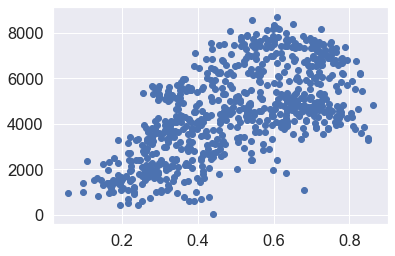

In [25]:
# Slicing day dataset
sns.set(font_scale=1.5)
x = day[['temp','cnt']]

# Ploting data 
plt.scatter(x['temp'],x['cnt']);

In [26]:
# Standardize the variables
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.82666213, -1.81795256],
       [-0.72109471, -1.91299949],
       [-1.63465665, -1.62992496],
       ...,
       [-1.32322427, -1.63405743],
       [-1.30955752, -1.39902293],
       [-1.52822548, -0.91707305]])

In [27]:
# Clustering
kmeans = KMeans(3)
kmeans.fit(x_scaled)
data_with_clusters = x.copy()
data_with_clusters['Cluster'] = kmeans.fit_predict(x_scaled)
# Dataframe contains the original values but predicted clusters are based on standardized data
data_with_clusters

,temp,cnt,Cluster
instant,,,
1,0.344167,985,0
2,0.363478,801,0
3,0.196364,1349,0
4,0.200000,1562,0
5,0.226957,1600,0
...,...,...,...
727,0.254167,2114,0
728,0.253333,3095,0
729,0.253333,1341,0


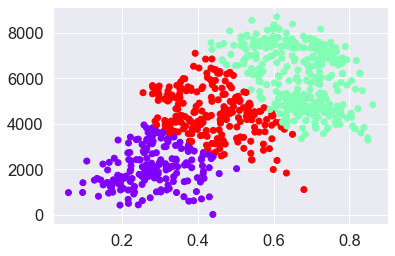

In [28]:
# Ploting clustered data 
plt.scatter(data_with_clusters['temp'],data_with_clusters['cnt'],c=data_with_clusters['Cluster'],cmap='rainbow');

### Selecting the number of clusters based on WCSS

In [29]:
# WCSS
wcss = []
for i in range(1,8):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[1461.9999999999986,
 570.9547813797689,
 409.3068054251215,
 270.85899497034023,
 220.16941324918963,
 186.41730709624986,
 157.56617631249077]

### The Elbow method

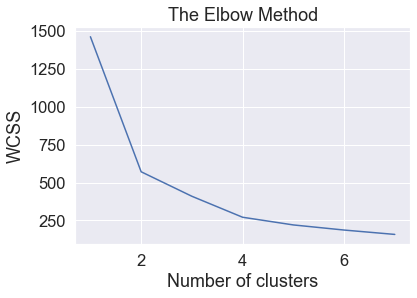

In [30]:
number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Interpretation of results

- According to the Elbow method, three is the best number of clusters.